![Image of Yaktocat](https://i0.wp.com/ctbeertours.com/wp-content/uploads/2016/07/kickstarter-website-banner.jpg?fit=955%2C328)

Kickstarter jest to uruchomiona w 2009 roku platforma, poświęcona crowdfundingowi, czyli społecznościowym zbiórkom pieniędzy. Finansowane są tam projekty takie jak filmy, animacje, gry komputerowe, karciane, planszowe, komiksy, albumy muzyczne, a także projekty związane ze sztuką, modą, fotografią, publicystyką, teatrem, tańcem, jedzeniem oraz nowoczesnymi technologiami.Osoby, które chcą wesprzeć projekt wpłacają pieniądze. Jeśli w ustalonym czasie uda się zebrać zadeklarowaną przez pomysłodawców kwotę, pieniądze – po potrąceniu prowizji serwisu – są im wypłacane. Gdy wymagana kwota nie zostanie zebrana, pieniądze wracają do osób, które wsparły projekt.

Pięć projektów, które zebrały największe fundusze:
1. Pebble Time - $20.338.986
2. Coolest Cooler - $13.285.226
3. Pebble 2, Time 2 - $12.779.843
4. Kingdom Death: Monster 1.5 - $12.393.139
5. Pebble E-Paper Watch for iPhone and Android - $10.266.845

In [ ]:
import pandas as pd
import numpy as np
import string

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import BallTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML

## Ładowanie danych.

In [ ]:
pd.set_option('display.max_columns', 12)
df = pd.read_csv('ks-projects-201801.csv')

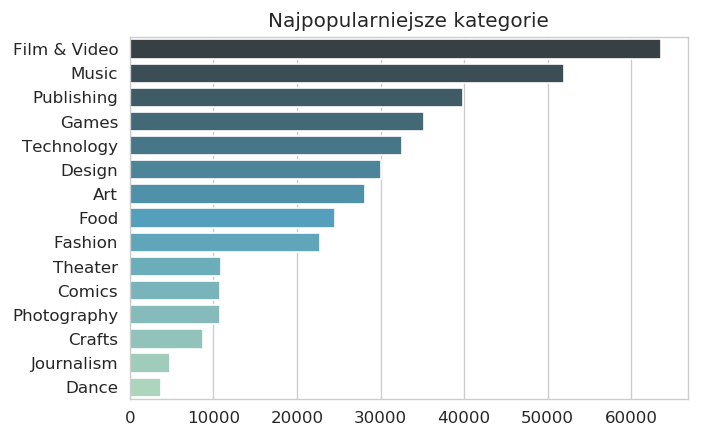

In [3]:
sns.set_style('whitegrid')
mains = df.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="GnBu_d")

plt.title('Najpopularniejsze kategorie')
plt.show()

## Przygotowanie danych.

In [4]:
categorical_columns = ['main_category']
df = pd.get_dummies(df, columns=categorical_columns)
df = df[df["state"].isin(["failed", "successful"])]
df["state"] = df["state"].apply(lambda x: 1 if x=="successful" else 0)
df = df.drop(columns=['ID', 'name', 'pledged', 'goal', 'usd pledged', 'usd_pledged_real', 'category', 'currency', 'country'], axis=1)
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')
df = df.drop(columns=['launched', 'deadline'])

## Usuwanie wartości odstających.

In [5]:
q1 = df['usd_goal_real'].quantile(0.25)
q3 = df['usd_goal_real'].quantile(0.75)
iqr = q3 - q1
down = q1 - 1.5 * iqr
up = q3 + 1.5 * iqr
df['usd_goal_real'] = df['usd_goal_real'][(df['usd_goal_real'] > down) & (df['usd_goal_real'] < up)]
df = df.dropna(axis=0, how='any')

In [6]:
X = df.drop(columns=['state'], axis=1)
y = df['state']

In [7]:
sc = preprocessing.StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [9]:
scorer = make_scorer(accuracy_score)
kfold = KFold(n_splits=5, random_state=11)

## Bayes

In [10]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
clf_gnb.fit(X_train,y_train)
y_pred_gnb = clf_gnb.predict(X_test)
cv_gnb = cross_val_score(clf_gnb, X_train, y_train, cv=kfold, scoring=scorer)
print('Bayes avg:\t', cv_gnb.mean())

Bayes avg:	 0.739583828972046


## SVM

In [11]:
clf_svm = LinearSVC(max_iter = 1000, C=1)
clf_svm.fit(X_train, y_train)
y_pred_svm= clf_svm.predict(X_test)
cv_svm = cross_val_score(clf_svm, X_train, y_train, cv=kfold, scoring=scorer)
print('svm results:\t', cv_svm)
print('svm result avg:\t', cv_svm.mean())

/home/lagasz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lagasz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lagasz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lagasz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lagasz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

svm results:	 [0.90031399 0.90007903 0.89834889 0.90084586 0.90073906]
svm result avg:	 0.9000653676439251


/home/lagasz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
